# Flight Ticket Price

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing train Dataset
df_train=pd.read_csv('Flight_ticket_price_train.csv')

In [3]:
#Checking Dataset
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#Importing test Dataset
df_test=pd.read_csv('Flight_ticket_price_test.csv')

In [5]:
#Checking Dataset
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
#Droping unnecessary columns
df_train=df_train.drop(['Date_of_Journey','Source','Destination','Dep_Time','Arrival_Time','Additional_Info'],axis=1)

In [7]:
#Checking Shape of train Dataframe
df_train.shape

(10683, 5)

In [8]:
#Checking Datatypes of columns of Dataframe
df_train.dtypes

Airline        object
Route          object
Duration       object
Total_Stops    object
Price           int64
dtype: object

In [9]:
#Checking Dataset
df_train.head()

,Airline,Route,Duration,Total_Stops,Price
0,IndiGo,BLR ? DEL,2h 50m,non-stop,3897
1,Air India,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,7662
2,Jet Airways,DEL ? LKO ? BOM ? COK,19h,2 stops,13882
3,IndiGo,CCU ? NAG ? BLR,5h 25m,1 stop,6218
4,IndiGo,BLR ? NAG ? DEL,4h 45m,1 stop,13302


In [10]:
#Checking Nullvalues in the Dataframe
df_train.isnull().sum()

Airline        0
Route          1
Duration       0
Total_Stops    1
Price          0
dtype: int64

In [11]:
#Dropping of null value
df_train=df_train.dropna()

In [12]:
#Checking Nullvalues in the Dataframe
df_train.isnull().sum()

Airline        0
Route          0
Duration       0
Total_Stops    0
Price          0
dtype: int64

Here we are Checking total counts of different values in the column.

In [13]:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [14]:
df_train['Route'].value_counts()

DEL ? BOM ? COK                2376
BLR ? DEL                      1552
CCU ? BOM ? BLR                 979
CCU ? BLR                       724
BOM ? HYD                       621
                               ... 
BOM ? RPR ? VTZ ? HYD             1
BOM ? JAI ? DEL ? HYD             1
BLR ? HBX ? BOM ? BHO ? DEL       1
CCU ? RPR ? HYD ? BLR             1
BOM ? NDC ? HYD                   1
Name: Route, Length: 128, dtype: int64

In [15]:
#df_train['Route']=df_train['Route'].replace('?','to')
df_train['Total_Stops']=df_train['Total_Stops'].replace('non-stop','0 stop')
df_train['Total_Stops']=df_train['Total_Stops'].str.slice(stop=-5).astype(int)
df_train['Duration']=df_train['Duration'].replace(['h ','m','h'],['.','','.0'],regex=True).astype(float)

In [16]:
df_train.head()

,Airline,Route,Duration,Total_Stops,Price
0,IndiGo,BLR ? DEL,2.50,0,3897
1,Air India,CCU ? IXR ? BBI ? BLR,7.25,2,7662
2,Jet Airways,DEL ? LKO ? BOM ? COK,19.00,2,13882
3,IndiGo,CCU ? NAG ? BLR,5.25,1,6218
4,IndiGo,BLR ? NAG ? DEL,4.45,1,13302


In [17]:
df_train.dtypes

Airline         object
Route           object
Duration       float64
Total_Stops      int32
Price            int64
dtype: object

(array([6.028e+03, 4.390e+03, 1.820e+02, 6.600e+01, 7.000e+00, 1.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1759. ,  9534.3, 17309.6, 25084.9, 32860.2, 40635.5, 48410.8,
        56186.1, 63961.4, 71736.7, 79512. ]),
 <a list of 10 Patch objects>)

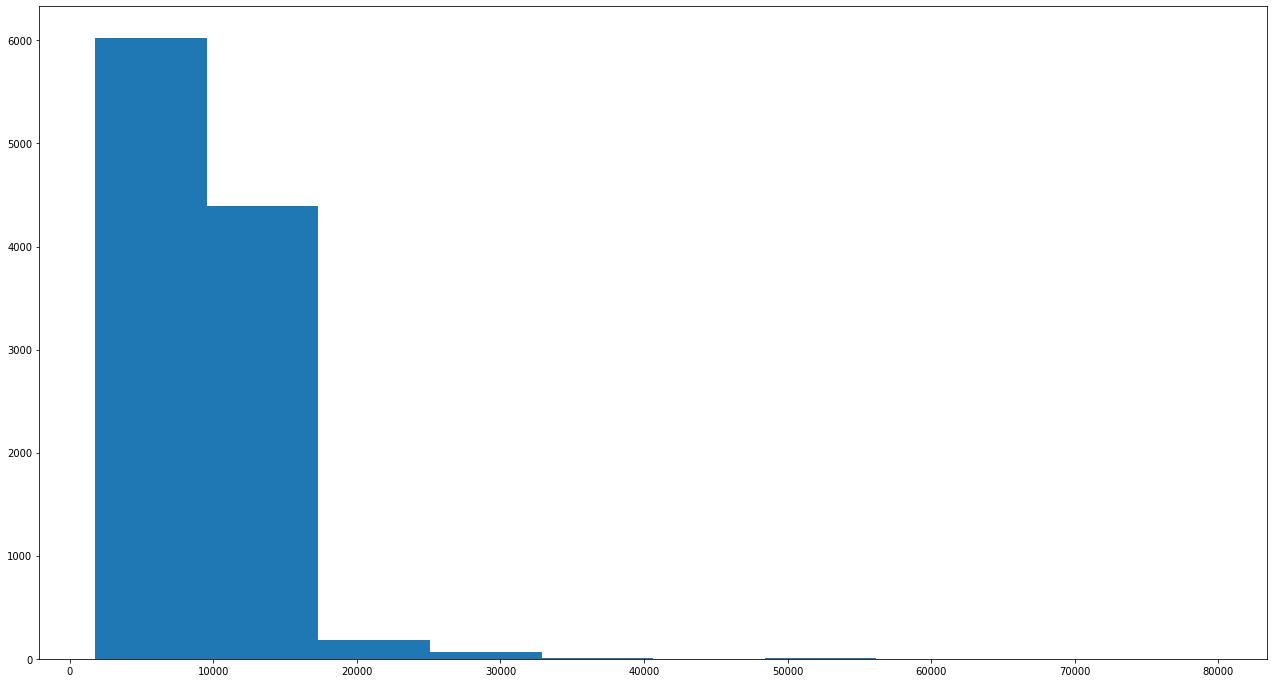

In [18]:
#Histogram graph
plt.figure(figsize=[22,12])
plt.hist(df_train['Price'])

From this plot we can observe the number of flight ticket price of a particular number. As we can see price between 0 to 10000 is ofaround 6000.

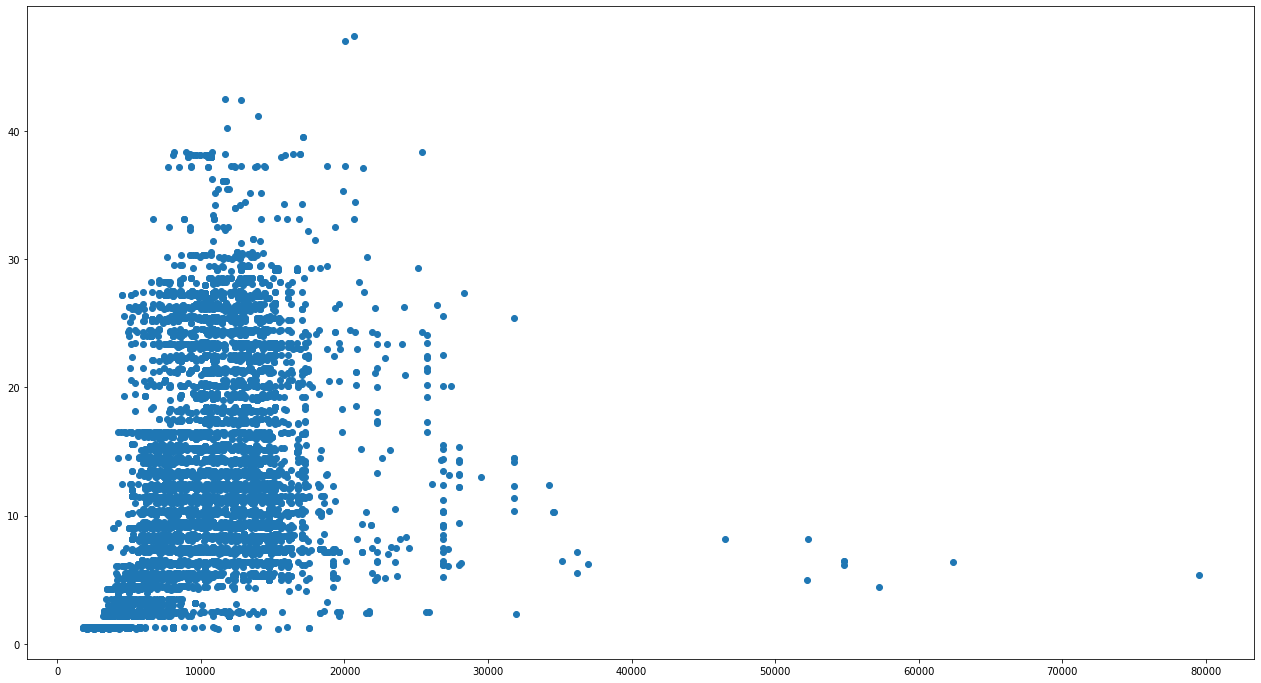

In [19]:
#Scatter Plot
plt.figure(figsize=[22,12])
plt.scatter(df_train['Price'],df_train['Duration'])

We can observe the relation between the price and the duration of flight.

<BarContainer object of 10682 artists>

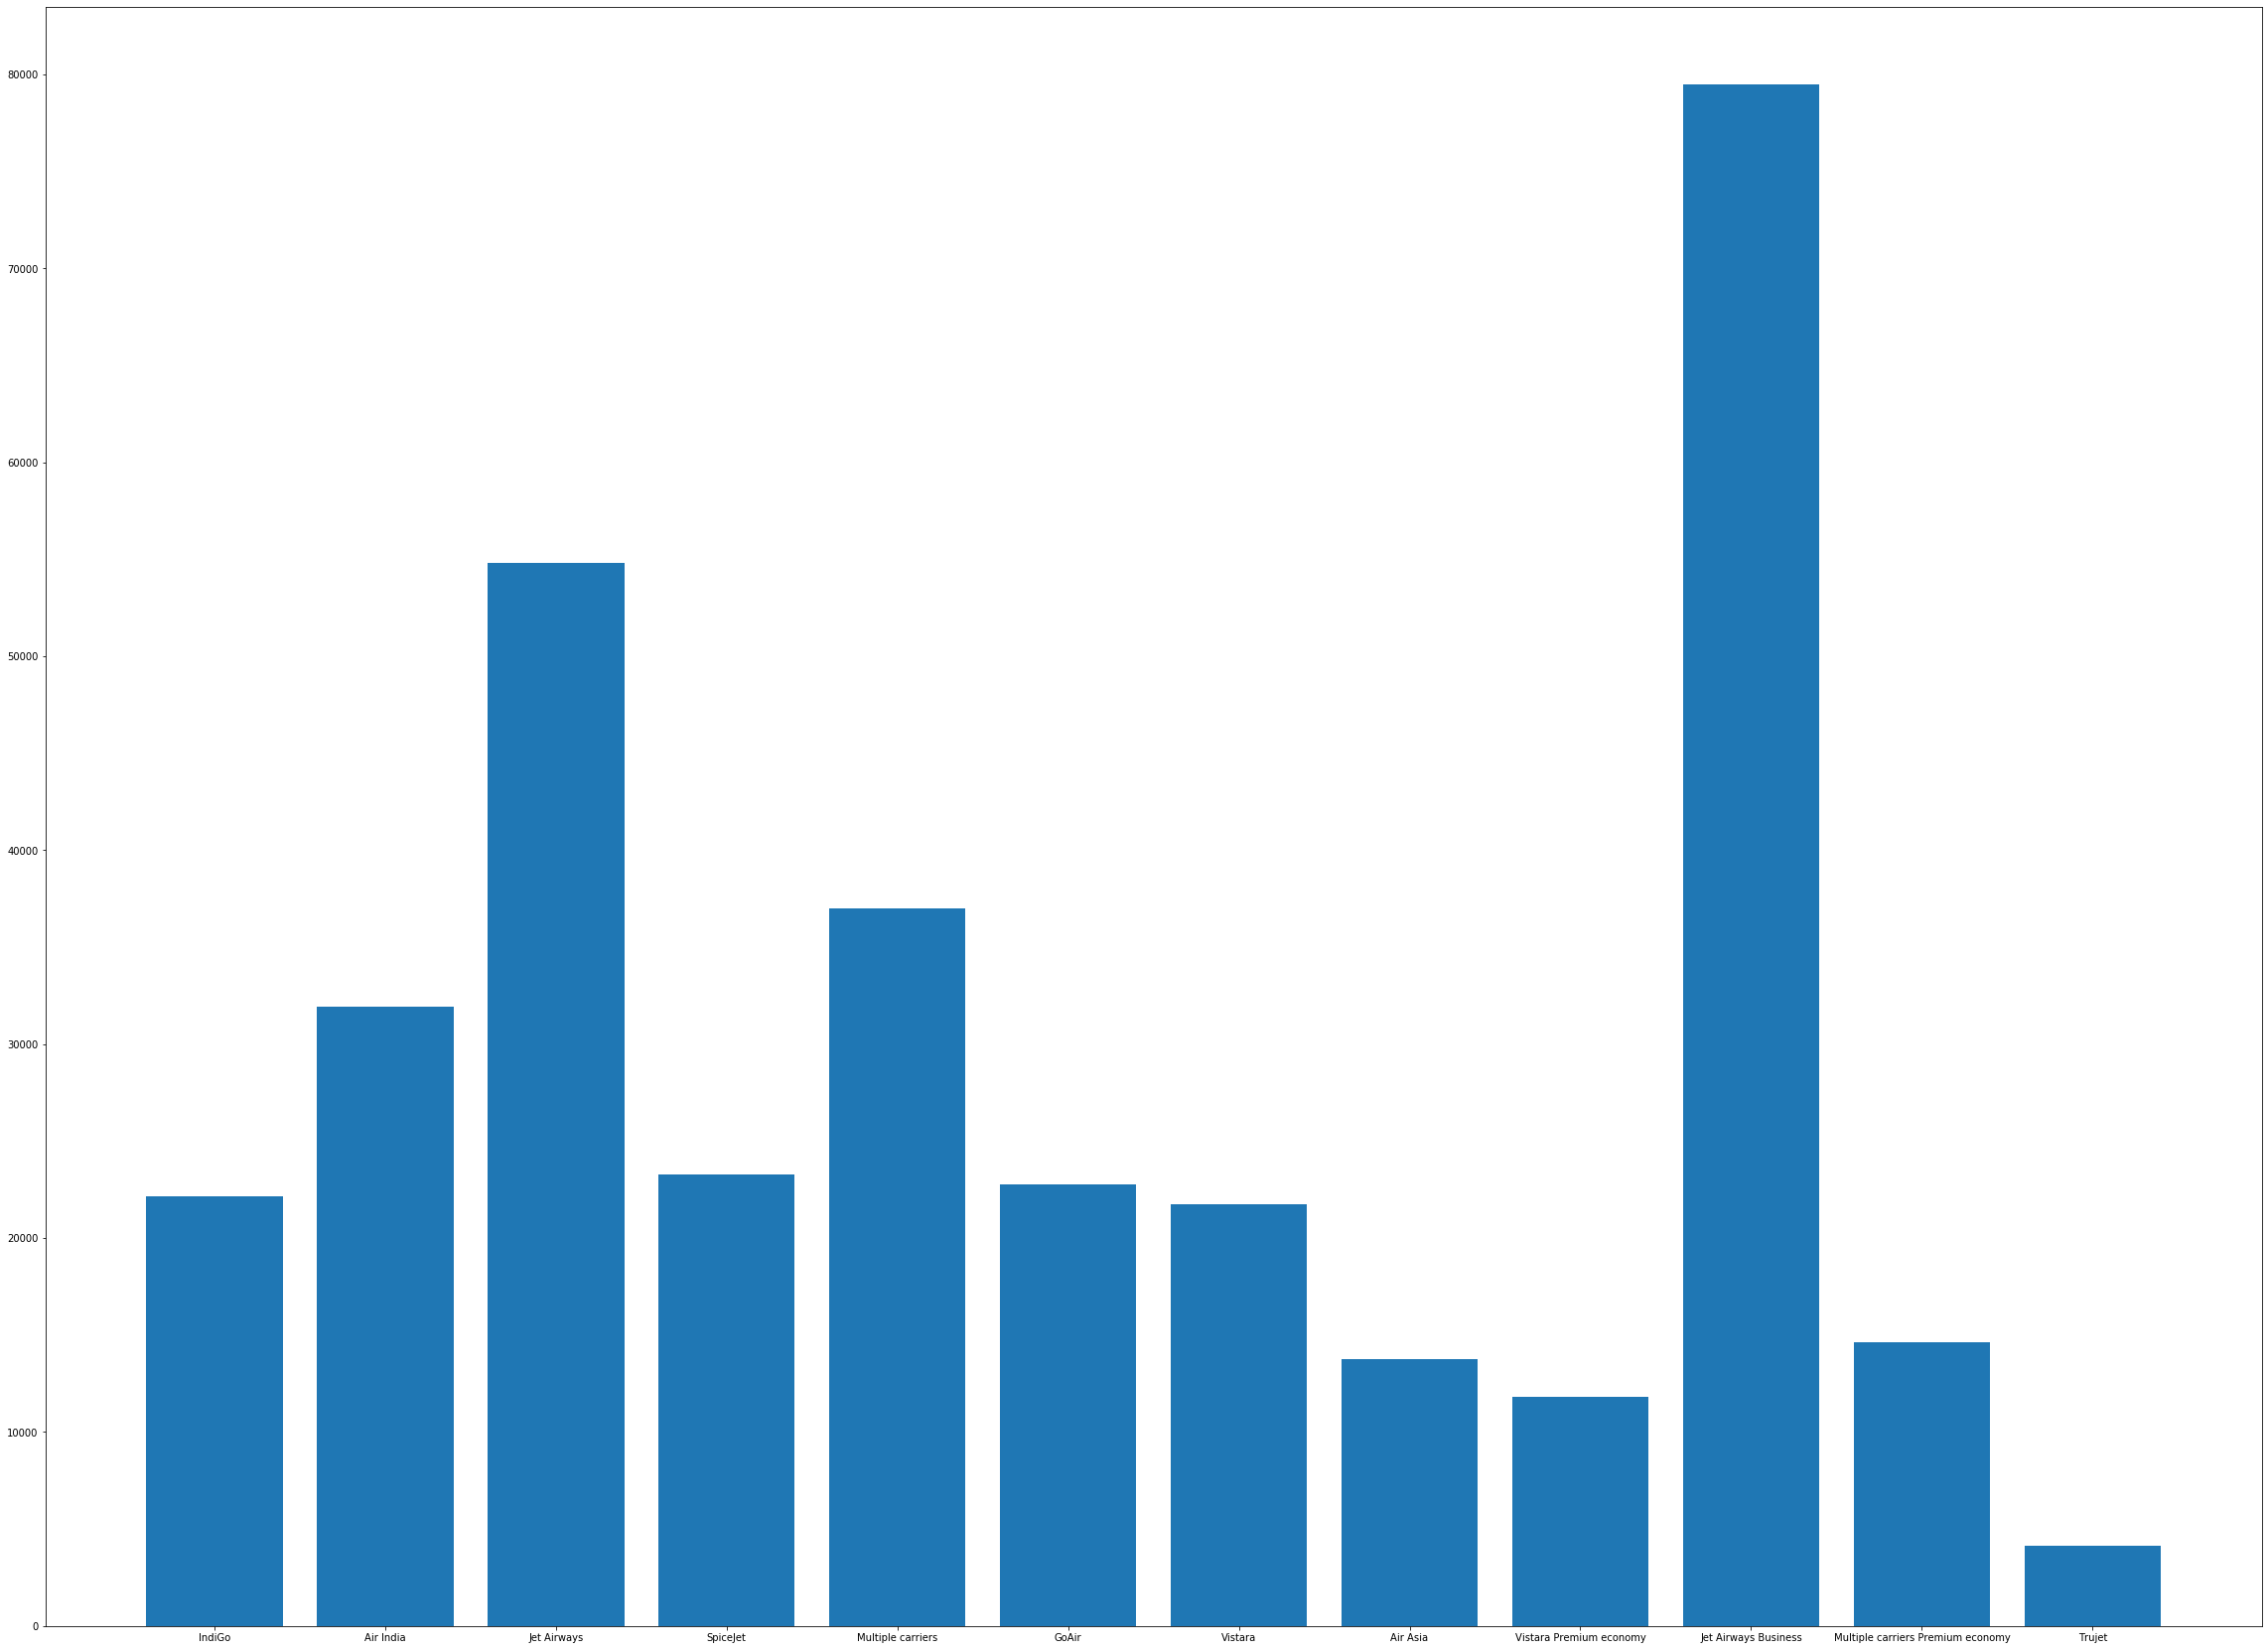

In [20]:
#Bar graph
plt.figure(figsize=[40,30])
plt.bar(df_train['Airline'],df_train['Price'])

We can analyse the price of different airlines from above graph. Jet airway premium economy is costly while trujet is the cheapest.

# Label Encoding of train dataset

Now we need to convert string values to numeric values so that our model can read the dataframe.

In [21]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train['Airline']=le.fit_transform(df_train['Airline'])
df_train['Route']=le.fit_transform(df_train['Route'])

In [22]:
#Checking Improved DataFrame
df_train.head()

,Airline,Route,Duration,Total_Stops,Price
0,3,18,2.50,0,3897
1,1,84,7.25,2,7662
2,4,118,19.00,2,13882
3,3,91,5.25,1,6218
4,3,29,4.45,1,13302


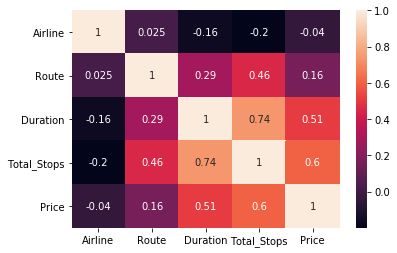

In [23]:
#Checkinh correlation
corr=df_train.corr()
sns.heatmap(corr,annot=True)

In [24]:
#Checking Statistical information
df_train.describe()

,Airline,Route,Duration,Total_Stops,Price
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,74.820165,10.554873,0.824190,9087.214567
std,2.352090,36.729039,8.483141,0.675229,4611.548810
min,0.000000,0.000000,1.150000,0.000000,1759.000000
25%,3.000000,48.000000,2.500000,0.000000,5277.000000
50%,4.000000,73.000000,8.400000,1.000000,8372.000000
75%,4.000000,104.000000,15.300000,1.000000,12373.000000
max,11.000000,127.000000,47.400000,4.000000,79512.000000


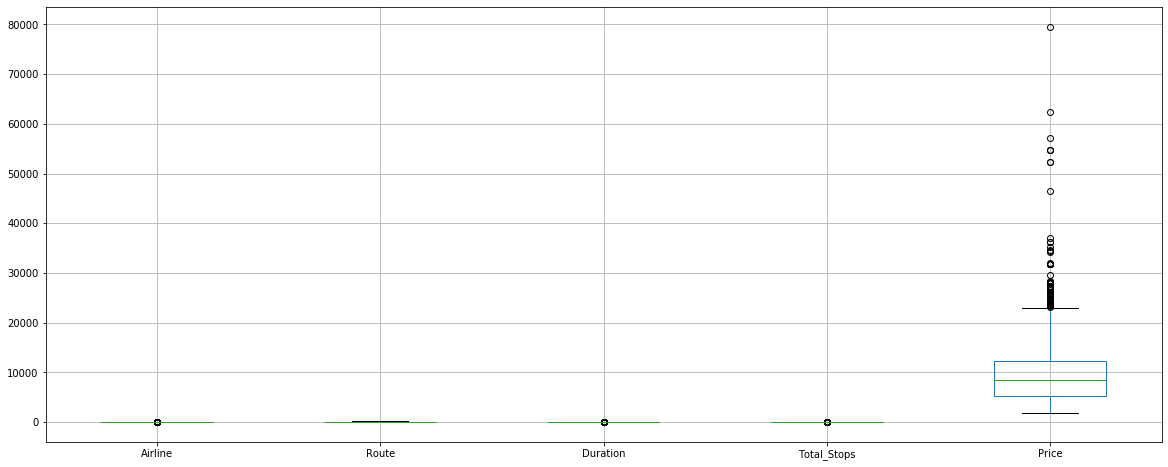

In [25]:
#Checking outliers
df_train.boxplot(figsize=[20,8])

In [26]:
#Improving outliers
from scipy import stats
z=np.abs(stats.zscore(df_train))
df_train_new=(z<3).all(axis=1)
df_train=df_train[df_train_new]

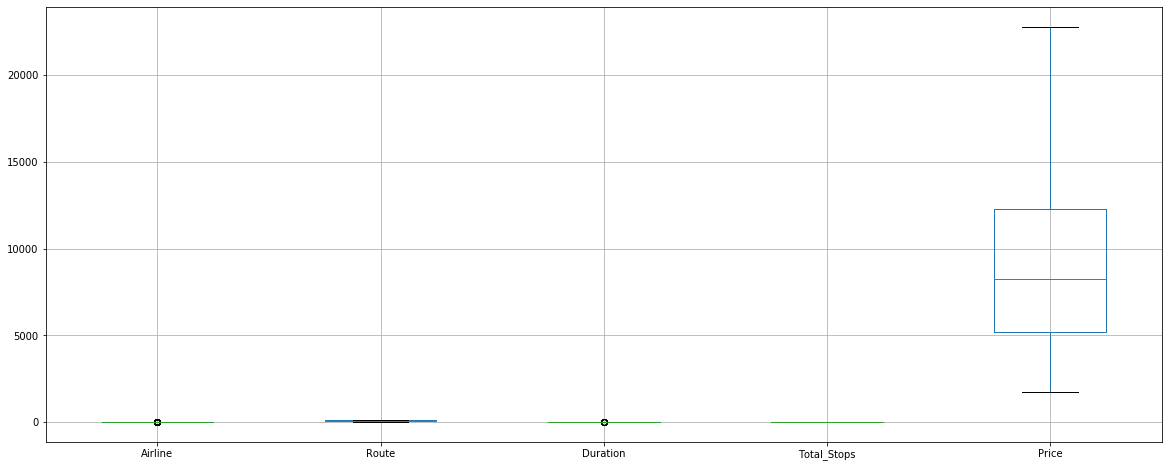

In [27]:
#Checking outliers
df_train.boxplot(figsize=[20,8])

In [28]:
#x,y Split
x=df_train.drop('Price',axis=1)
y=df_train['Price']

In [29]:
#Checking skewness
x.skew()

Airline        0.730245
Route         -0.504805
Duration       0.771265
Total_Stops    0.229781
dtype: float64

In [30]:
#improving skewness
from sklearn.preprocessing import power_transform
pt=power_transform(x, method='yeo-johnson')
x=pd.DataFrame(pt,columns=x.columns)
x.skew()

Airline       -0.013733
Route         -0.435186
Duration      -0.018776
Total_Stops   -0.070815
dtype: float64

In [31]:
#Checking test Dataset
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [32]:
#Dropping of unnecessary column
df_test=df_test.drop(['Date_of_Journey','Source','Destination','Dep_Time','Arrival_Time','Additional_Info'],axis=1)

In [33]:
#Checking Shape of Dataframe
df_test.shape

(2671, 4)

In [34]:
#Checking Datatypes of columns of Dataframe
df_test.dtypes

Airline        object
Route          object
Duration       object
Total_Stops    object
dtype: object

In [35]:
#Checking Nullvalues in the Dataframe
df_test.isnull().sum()

Airline        0
Route          0
Duration       0
Total_Stops    0
dtype: int64

Checking different values total counts in the column

In [36]:
df_test['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In [37]:
df_test['Total_Stops']=df_test['Total_Stops'].replace('non-stop','0 stop')
df_test['Total_Stops']=df_test['Total_Stops'].str.slice(stop=-5).astype(int)
df_test['Duration']=df_test['Duration'].replace(['h ','m','h'],['.','','.0'],regex=True).astype(float)

In [38]:
df_test.head()

,Airline,Route,Duration,Total_Stops
0,Jet Airways,DEL ? BOM ? COK,10.55,1
1,IndiGo,CCU ? MAA ? BLR,4.00,1
2,Jet Airways,DEL ? BOM ? COK,23.45,1
3,Multiple carriers,DEL ? BOM ? COK,13.00,1
4,Air Asia,BLR ? DEL,2.50,0


In [39]:
df_test.dtypes

Airline         object
Route           object
Duration       float64
Total_Stops      int32
dtype: object

# Label Encoding of test dataset

In [40]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_test['Airline']=le.fit_transform(df_test['Airline'])
df_test['Route']=le.fit_transform(df_test['Route'])

In [41]:
df_test.head()

,Airline,Route,Duration,Total_Stops
0,4,76,10.55,1
1,3,65,4.00,1
2,4,76,23.45,1
3,6,76,13.00,1
4,0,16,2.50,0


In [42]:
#Checking Statistical information
df_test.describe()

,Airline,Route,Duration,Total_Stops
count,2671.000000,2671.000000,2671.000000,2671.000000
mean,3.972669,54.356421,10.499158,0.833396
std,2.295657,27.128993,8.382846,0.672315
min,0.000000,0.000000,1.150000,0.000000
25%,3.000000,33.000000,2.550000,0.000000
50%,4.000000,51.000000,8.400000,1.000000
75%,6.000000,76.000000,15.200000,1.000000
max,10.000000,99.000000,40.400000,4.000000


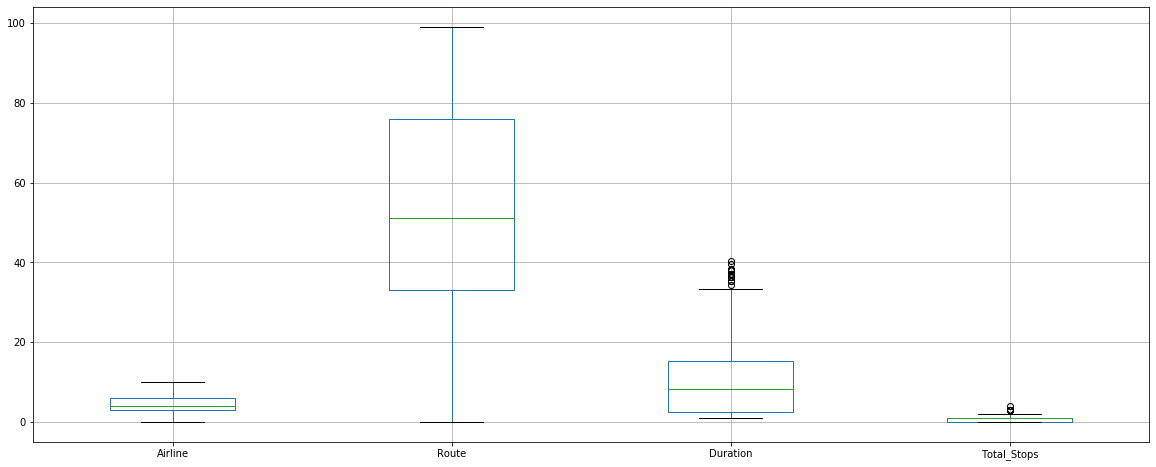

In [43]:
#Checking Outlier
df_test.boxplot(figsize=[20,8])

In [44]:
#Improving outlier
from scipy import stats
z=np.abs(stats.zscore(df_test))
df_test_new=(z<3).all(axis=1)
df_test=df_test[df_test_new]

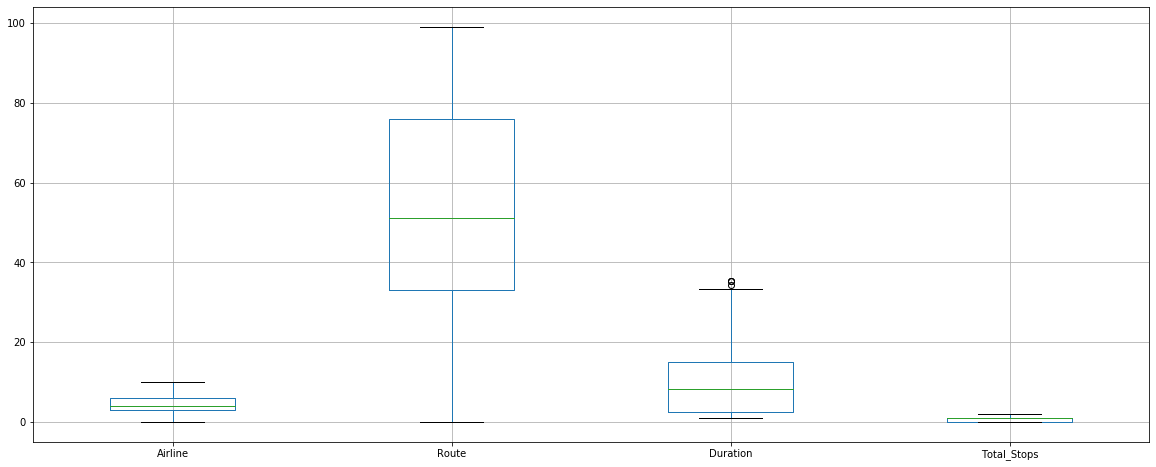

In [45]:
#Checking outlier
df_test.boxplot(figsize=[20,8])

In [46]:
#Checking skewness
df_test.skew()

Airline        0.479149
Route         -0.274971
Duration       0.804893
Total_Stops    0.204759
dtype: float64

In [47]:
#improving skewness
from sklearn.preprocessing import power_transform
pt=power_transform(df_test, method='yeo-johnson')
df_test=pd.DataFrame(pt,columns=df_test.columns)
df_test.skew()

Airline       -0.041774
Route         -0.317535
Duration      -0.024367
Total_Stops   -0.074843
dtype: float64

In [48]:
df_test.to_csv('Flight_Ticket_Price.csv')

In [49]:
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [50]:
#Finding the best random state
max_score=0
max_state=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.3)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    r2score=r2_score(y_test,pred)
    if max_score<r2score:
        max_score=r2score
        random_state=i
        print('r2score is :',max_score,'random_state is :',random_state)

r2score is : 0.4970734031160441 random_state is : 0
r2score is : 0.512641788833158 random_state is : 1
r2score is : 0.51707222248776 random_state is : 2
r2score is : 0.5214848617283709 random_state is : 4
r2score is : 0.5264378600950674 random_state is : 5
r2score is : 0.5353374866617864 random_state is : 8
r2score is : 0.5421614998545963 random_state is : 52


# Train Test split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=64,test_size=0.3)

# ML Alogrithms

In [52]:
#Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
r2_score(y_test,predlr)

0.5065161618308567

In [53]:
#KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
r2_score(y_test,predknn)

0.6617906457257843

In [54]:
#RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predrfr=rfr.predict(x_test)
r2_score(y_test,predrfr)

0.6726864279636855

In [55]:
#DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2_score(y_test,preddtr)

0.6498206429043774

# Cross Validation Score

In [56]:
#Linear Regression
from sklearn.model_selection import cross_val_score
scr1=cross_val_score(lr,x,y,cv=5)
print('Cross Validation Score is:',scr1.mean())

Cross Validation Score is: 0.5142229710451351


In [57]:
#KNeighborsRegressor
scr2=cross_val_score(knn,x,y,cv=5)
print('Cross Validation Score is:',scr2.mean())

Cross Validation Score is: 0.6593446645543365


In [58]:
#RandomForestRegressor
scr3=cross_val_score(rfr,x,y,cv=5)
print('Cross Validation Score is:',scr3.mean())

Cross Validation Score is: 0.676465599211866


In [59]:
#DecisionTreeRegressor
scr4=cross_val_score(dtr,x,y,cv=5)
print('Cross Validation Score is:',scr4.mean())

Cross Validation Score is: 0.6555092490563907


# Hyper Tuning Parameter

In [60]:
#Grid SearchCV
from sklearn.model_selection import GridSearchCV
parameter={'n_jobs':np.arange(2,15)}
gcv= GridSearchCV(knn,parameter,cv=5)
gcv.fit(x_train,y_train)
gcv.best_params_

{'n_jobs': 2}

In [61]:
#Predicting values from Grid SearchCV
predgcv=gcv.best_estimator_.predict(x_test)
r2_score(y_test,predgcv)

0.6617906457257843

In [62]:
#Saving Model
import joblib
joblib.dump(gcv.best_estimator_,'Flight_Ticket_Price_Prediction.pk1')

['Flight_Ticket_Price_Prediction.pk1']

In [63]:
mod=joblib.load('Flight_Ticket_Price_Prediction.pk1')

In [64]:
predmod=mod.predict(df_test)
predmod

array([ 9074.8,  4226. , 13135.2, ..., 12854.8,  8398.6,  7659. ])

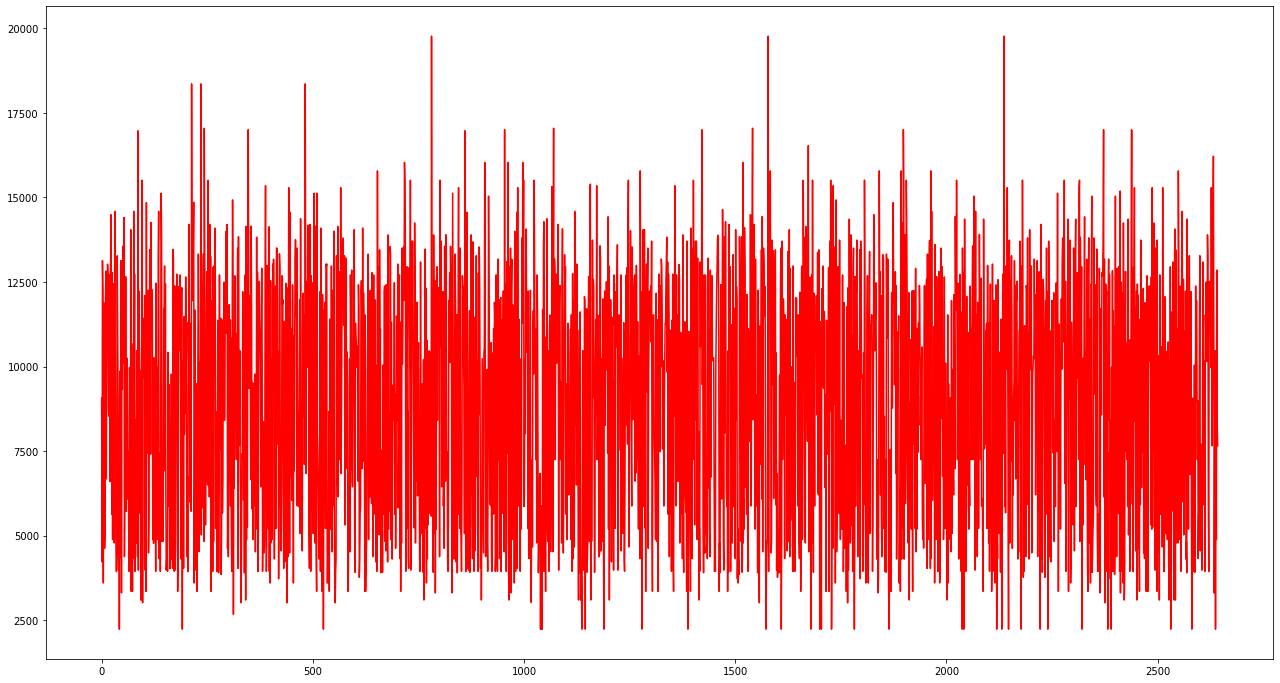

In [87]:
plt.figure(figsize=[22,12])
plt.plot(predmod,color='r')
plt.show()

# Conclusion

In this project we have observed that KNeighborsRegressor is the best fit model with accuracy score of 66%.

We have observed that our most of predict value are between around 4000 to 12500.